In [1]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
N = 52

In [3]:
cities = {}

f = open('berlin.txt')
for line in f:
    n, x, y = line.strip().split(' ')
    cities[int(n)] = np.array([float(x), float(y)])
f.close()

# cities

In [4]:
dist = np.zeros((N, N))
for i in range(1, N + 1):
    for j in range(1, i):
        dist[i - 1][j - 1] = np.linalg.norm(cities[i] - cities[j])
        dist[j - 1][i - 1] = dist[i - 1][j - 1]
# dist

In [5]:
def init(n):
    pop = []
    for j in range(n):
        e = []
        for i in range(N):
            e.append(np.random.randint(1, N - i + 1))
        pop.append(e)
    return pop

In [22]:
def etotour(e):
    basis = list(range(1, N + 1))
    tour = []
    for i, e_i in enumerate(e):
        tour.append(basis.pop(e_i - 1))
    return tour

In [6]:
def fit(e):
    basis = list(range(1, N + 1))
    tour = []
    for i, e_i in enumerate(e):
        tour.append(basis.pop(e_i - 1))

    distance = 0
    for i in range(N - 1):
        distance += dist[tour[i] - 1, tour[i + 1] - 1]
    distance += dist[tour[-1] - 1, tour[0] - 1]
    return distance

In [7]:
def reproduction(pop):
    pop_fit = [fit(e) for e in pop]
    ch_p = [1 - p / sum(pop_fit) for p in pop_fit]
#     print(pop_fit)
#     print(ch_p)
    res = random.choices(pop, weights=ch_p, k=n)
    return res

In [10]:
def selection(pop):
    new_pop = []
    for _ in range(len(pop)):
        a = random.randint(0, n - 1)
        b = random.randint(0, n - 1)
        new = pop[a] if (fit(pop[a]) < fit(pop[a])) else pop[b]
        new_pop.append(new)
    return new_pop

In [9]:
def selection(pop):
    new_ind = list(range(n))
    random.shuffle(new_ind)
    new_pop = []
    for a in new_ind:
        new_pop.append(pop[a])
    return new_pop

In [11]:
def crossingover(pop):
    for i in range(0, n - 1, 2):
#         if random.choices([True, False], weights=[p, 1 - p], k=1)[0]:
        k = random.randint(1, N-1)
        pop[i], pop[i + 1] = pop[i][:k] + pop[i + 1][k:], pop[i + 1][:k] + pop[i][k:]
    return pop

In [12]:
def mutation(pop):
    new_pop = pop.copy()
    for cr in new_pop:
#         if random.choices([True, False], weights=[p, 1 - p], k=1)[0]:
        k = random.randint(0, N - 1)
        cr[k] = random.randint(1, N - k)
    return new_pop

In [13]:
def reduction(pop):
    unique_pop = list(np.unique(pop, axis=0))
    for v in range(len(unique_pop)):
        unique_pop[v] = list(unique_pop[v])
    fit_pop = [fit(ch) for ch in unique_pop]
    fit_sorted = sorted(range(len(unique_pop)), key=fit_pop.__getitem__)
    new_pop = []
    for i in fit_sorted[:n]:
        new_pop.append(unique_pop[i])
    return new_pop, fit_pop[fit_sorted[0]]

In [14]:
def get_best(pop):
    best = fit(pop[0])
    for e in pop[1:]:   
        if fit(e) < best:
            best = fit(e)
    return best

In [15]:
# N = 10 # длина тура
n_iter = 300
n = 500 # размер популяции

# par = 600 # количество родителей
# p_c = 0.5 # вероятность кроссинговера
# p_m = 0.001 # вероятность мутации

# p_c_list = [0.1, 0.2, 0.3, 0.5, 0.8]
# p_m_list = [0.001, 0.002, 0.01, 0.1, 0.5]

# r_pop = reproduction(pop, par)
# c_pop = crossingover(r_pop, par, p_c)
# m_pop = mutation(c_pop, p_m)
# pop, m = reduction(pop + c_pop)
# m

In [16]:
%%time

res = []

pop = init(n)
best = get_best(pop)
i = 0 
start = time.time()
while(i < n_iter):   
#     r_pop = reproduction(pop)
    r_pop = selection(pop)
#     r_pop = pop.copy()
    c_pop = crossingover(r_pop)
    m_pop = mutation(c_pop)
    pop, best = reduction(pop + c_pop + m_pop)    
#     m_best = get_best(m_pop)
#     if m_best < best:
#         pop = m_pop
#         best = m_best
    i += 1
    res.append(best)
    
res_t = time.time() - start

Wall time: 2min 4s


In [423]:
res_t

344.4831733703613

In [17]:
res[-1]

13076.864914228721

Text(0.5, 1.0, '500 особей')

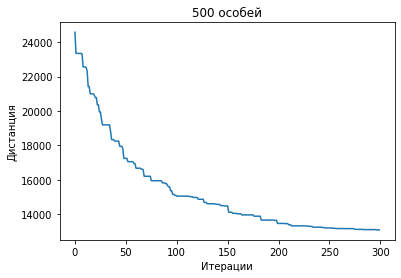

In [18]:
plt.plot(range(n_iter), res)
plt.xlabel('Итерации')
plt.ylabel('Дистанция')
plt.title(str(n) + ' особей')
# plt.savefig('3plot_' + str(n) + '.png')

In [426]:
# res[300]

Text(0.5, 1.0, '500 особей')

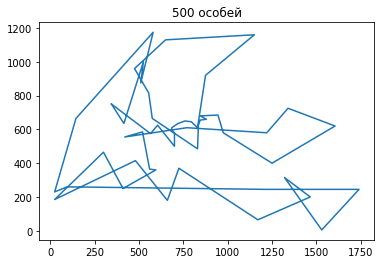

In [23]:
x = []
y = []
for city in etotour(pop[0]):
    x.append(cities[city][0])
    y.append(cities[city][1])
x.append(cities[pop[0][0]][0])
y.append(cities[pop[0][0]][1])
plt.plot(x, y)
plt.title(str(n) + ' особей')
# plt.savefig('3image_' + str(n) + '.png')

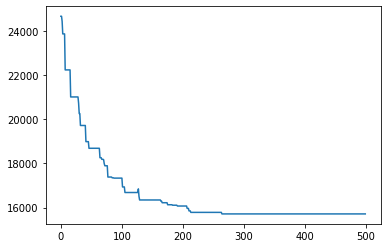

In [88]:
plt.plot(range(500), res)

In [89]:
res[-1]

15710.76907057647

In [57]:
res[-1]

22000.40051195524

In [62]:
res[-1]

22840.28872357606

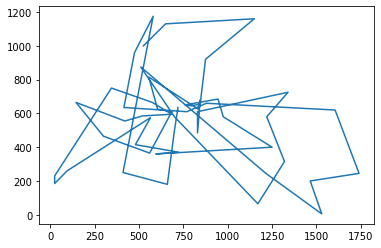

In [90]:
x = []
y = []
for city in etotour(pop[0]):
    x.append(cities[city][0])
    y.append(cities[city][1])
plt.plot(x, y)

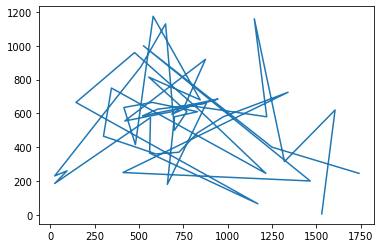

In [66]:
plt.plot(x, y)

In [74]:
pop = init(n)

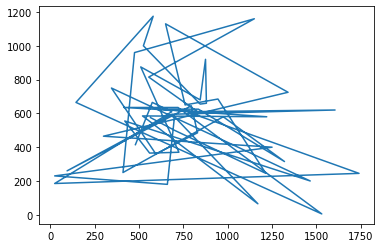

In [73]:
x = []
y = []
for city in etotour(pop[0]):
    x.append(cities[city][0])
    y.append(cities[city][1])
plt.plot(x, y)

In [429]:
best = [1, 49, 32, 45, 19, 41, 8, 9, 10, 43, 33, 51, 11, 52, 14, 13, 47, 26, 27, 28, 12, 25, 4, 6, 15, 5, 24, 48, 38, 37, 40, 39, 36, 35, 34, 44, 46, 16, 29, 50, 20, 23, 30, 2, 7, 42, 21, 17, 3, 18, 31, 22]

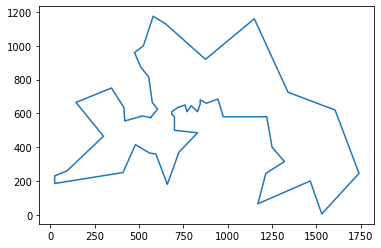

In [432]:
x = []
y = []
for city in best:
    x.append(cities[city][0])
    y.append(cities[city][1])
x.append(cities[best[0]][0])
y.append(cities[best[0]][1])
plt.plot(x, y)

In [84]:
fit(best)

7544.365901904087

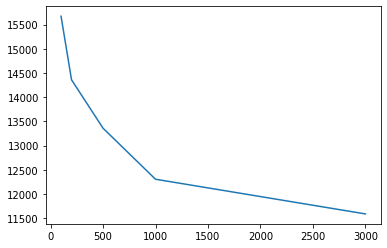

In [438]:
plt.plot([100, 200, 500, 1000, 3000], [15673, 14359, 13359, 12304, 11587])
# plt.xscale('log')
# plt.yscale('log')